<a href="https://colab.research.google.com/github/2303A51078/AIML_2025_B16/blob/main/2303a51078_aiml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

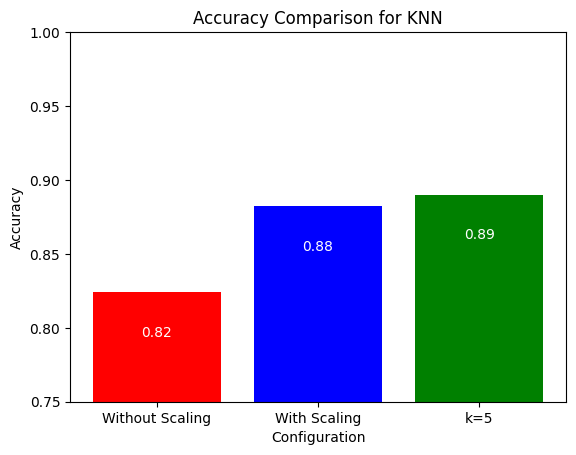

Results Summary:
Accuracy without Scaling: 0.824
Confusion Matrix without Scaling: [[9545  948]
 [1428 1579]]
Accuracy with Scaling: 0.8822222222222222
Confusion Matrix with Scaling: [[9773  720]
 [ 870 2137]]
Accuracy with k=5: 0.8899259259259259


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred)
conf_matrix_without_scaling = confusion_matrix(y_test, y_pred)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_scaled)
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
def plot_accuracy_comparison(results):
    labels = ["Without Scaling", "With Scaling", "k=5"]
    accuracies = [results["Accuracy without Scaling"],
                  results["Accuracy with Scaling"],
                  results["Accuracy with k=5"]]

    plt.bar(labels, accuracies, color=['red', 'blue', 'green'])
    plt.ylim(0.75, 1.0)
    plt.xlabel("Configuration")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison for KNN")
    for i, acc in enumerate(accuracies):
        plt.text(i, acc - 0.03, f"{acc:.2f}", ha='center', color='white')
    plt.show()
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()
results = {
    "Accuracy without Scaling": accuracy_without_scaling,
    "Confusion Matrix without Scaling": conf_matrix_without_scaling,
    "Accuracy with Scaling": accuracy_with_scaling,
    "Confusion Matrix with Scaling": conf_matrix_with_scaling,
    "Accuracy with k=5": accuracy_k5
}
plot_accuracy_comparison(results)
if X.shape[1] == 2:
    plot_decision_boundary(X_train_scaled, y_train, knn_scaled, "KNN Decision Boundary (k=3)")
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")